In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PLred.visPLred import couplingmap as cm
import PLred.mapmodel as mm
import importlib
importlib.reload(cm)
importlib.reload(mm)
from PLred.imageutils import show_voronoi


In [2]:
mapmodel1 = mm.VoronoiCouplingMapModel(model = 'mizarB2_polymodel.fits')
mapmodel2 = mm.VoronoiCouplingMapModel(model = 'mizarA2_polymodel.fits')
mapmodel3 = mm.VoronoiCouplingMapModel(model = 'mizarA2_polymodel.fits',
                coeff_model='mizarB2_polymodel.fits')


loading model
loading model
loading model
Loading coefficients from separate model


In [3]:
def make_fov_mask(mapmodel, center, radius):
    """Create a mask for the field of view centered at `center` with a given `radius`."""
    x = mapmodel.cluster_centers[:, 0]
    y = mapmodel.cluster_centers[:, 1]
    dist = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    return dist < radius




<Axes: >

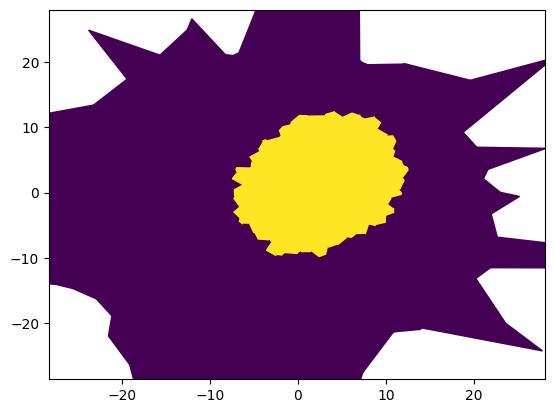

In [4]:
mask1 = make_fov_mask(mapmodel2, center=(5, 0), radius=12)
mask2 = make_fov_mask(mapmodel2, center=(0, 3), radius=12)
show_voronoi(mapmodel2.vor, mask1 & mask2)

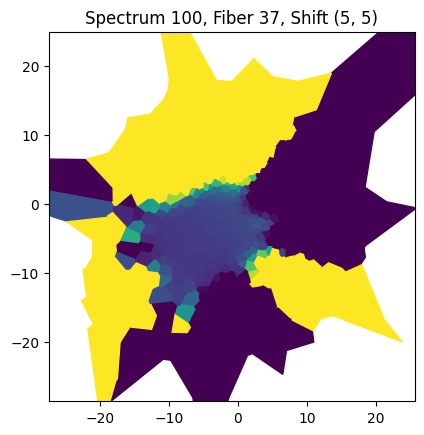

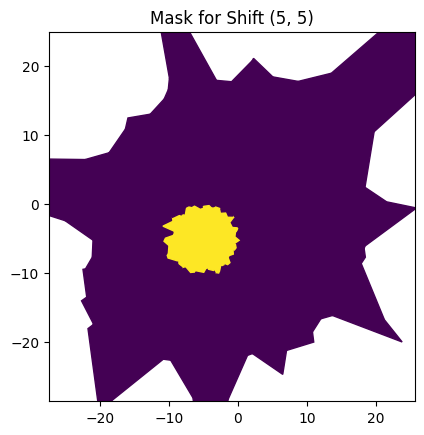

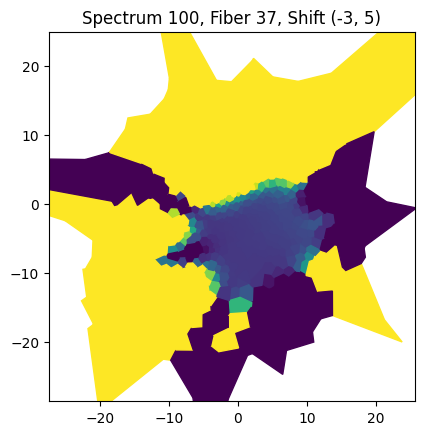

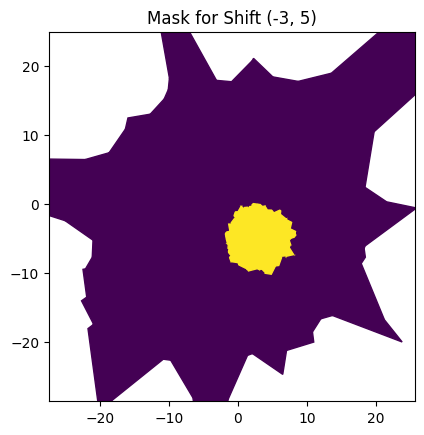

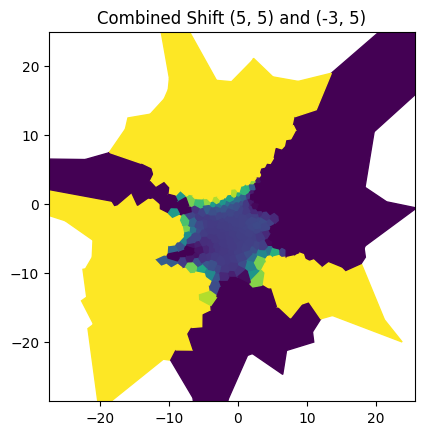

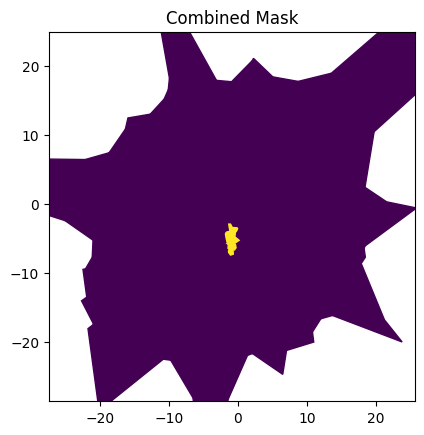

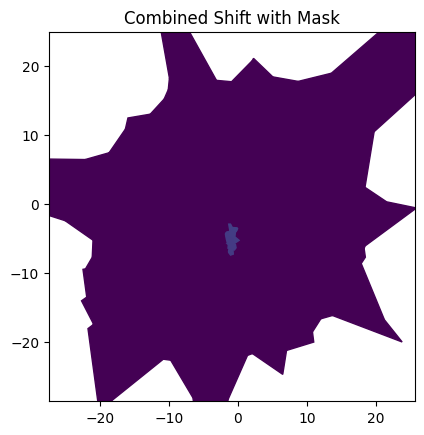

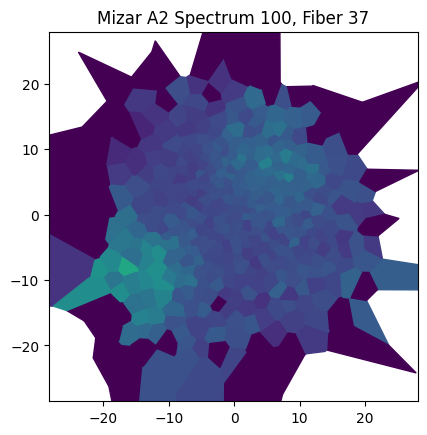

In [19]:
specind = 100
fibind = 37
xshift1 = 5
yshift1 = 5

xshift2 = -3
yshift2 = 5

fov_radius = 5

point1 = mapmodel1.compute_vec(specind, fibind, xshift1, yshift1)
ax = show_voronoi(mapmodel1.vor, point1, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask1 = make_fov_mask(mapmodel1, center=(-xshift1, -yshift1), radius=fov_radius)
ax = show_voronoi(mapmodel1.vor, mask1)
ax.set_title(f'Mask for Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

point2 = mapmodel1.compute_vec(specind, fibind, xshift2, yshift2)
ax = show_voronoi(mapmodel1.vor, point2, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask2 = make_fov_mask(mapmodel1, center=(-xshift2, -yshift2), radius=fov_radius)
ax = show_voronoi(mapmodel1.vor, mask2)
ax.set_title(f'Mask for Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

combined = (point1 + point2)/2
ax = show_voronoi(mapmodel1.vor, combined, vmin=0, vmax=0.01)
ax.set_title(f'Combined Shift ({xshift1}, {yshift1}) and ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask_combined = mask1 & mask2
ax = show_voronoi(mapmodel1.vor, mask_combined)
ax.set_title('Combined Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ax = show_voronoi(mapmodel1.vor, combined * mask_combined, vmin=0, vmax=0.01)
ax.set_title('Combined Shift with Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ax = show_voronoi(mapmodel2.vor, mapmodel2.normdata[:, fibind, specind], vmin=0, vmax=0.01)
ax.set_title(f'Mizar A2 Spectrum {specind}, Fiber {fibind}')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

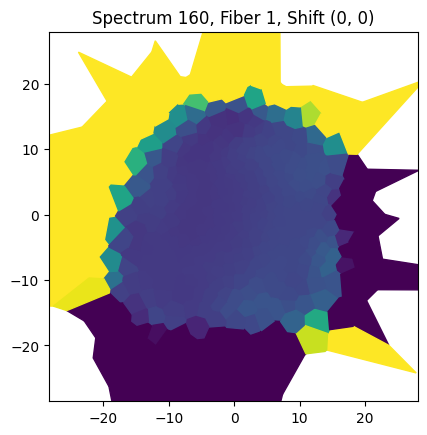

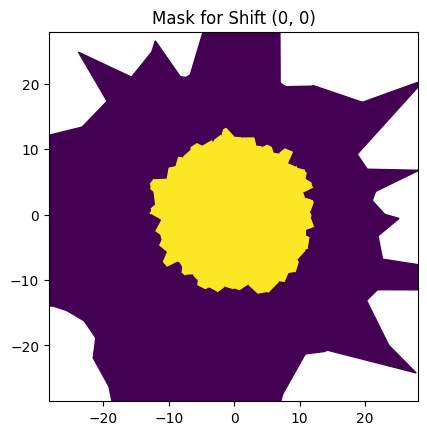

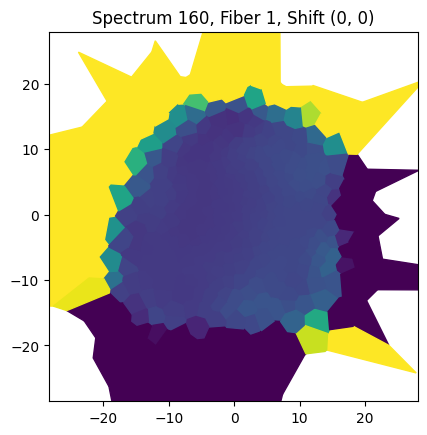

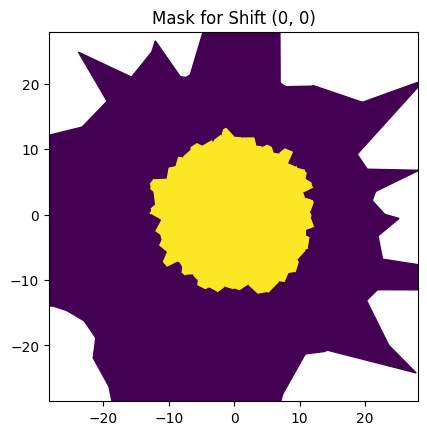

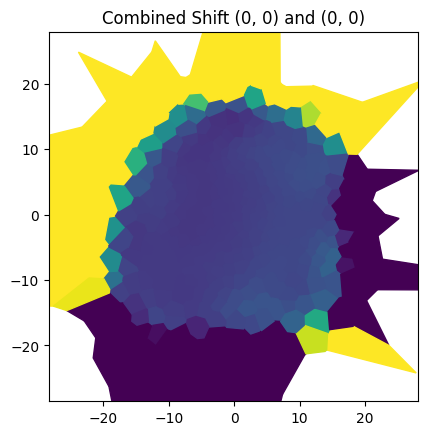

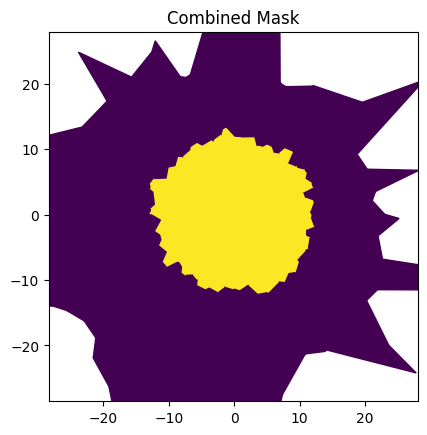

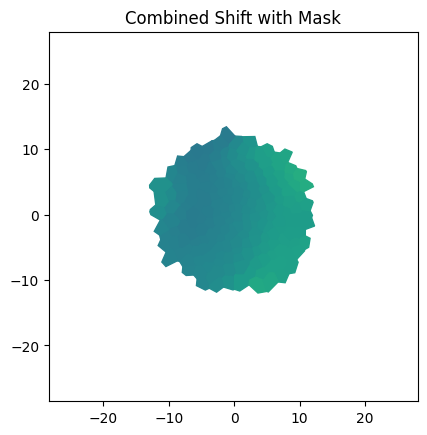

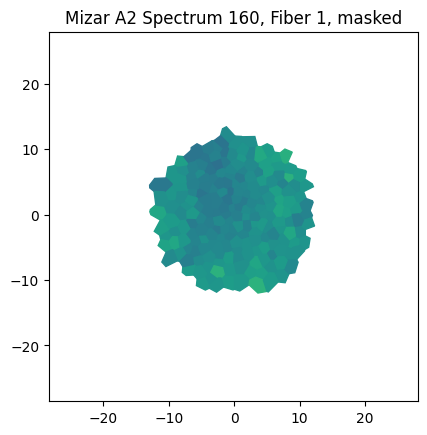

In [203]:
specind = 160
fibind = 1
xshift1 = 0
yshift1 = 0#-2.5

xshift2 = 0#1.5
yshift2 = 0#1.5

point1 = mapmodel3.compute_vec(specind, fibind, xshift1, yshift1)
ax = show_voronoi(mapmodel3.vor, point1, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask1 = make_fov_mask(mapmodel3, center=(-xshift1, -yshift1), radius=12)
ax = show_voronoi(mapmodel3.vor, mask1)
ax.set_title(f'Mask for Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

point2 = mapmodel3.compute_vec(specind, fibind, xshift2, yshift2)
ax = show_voronoi(mapmodel3.vor, point2, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask2 = make_fov_mask(mapmodel3, center=(-xshift2, -yshift2), radius=12)
ax = show_voronoi(mapmodel3.vor, mask2)
ax.set_title(f'Mask for Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

combined = (point1 + point2)/2
ax = show_voronoi(mapmodel3.vor, combined, vmin=0, vmax=0.01)
ax.set_title(f'Combined Shift ({xshift1}, {yshift1}) and ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask_combined = mask1 & mask2
ax = show_voronoi(mapmodel3.vor, mask_combined)
ax.set_title('Combined Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask_combined = mask_combined.astype(float)
mask_combined[mask_combined == 0] = np.nan  # Convert mask to float and set 0s to NaN for masking
masked_model = combined * mask_combined

renormalized_model = masked_model / np.nansum(masked_model)  # Renormalize the masked model

ax = show_voronoi(mapmodel3.vor, renormalized_model, vmin=0, vmax=0.01)
ax.set_title('Combined Shift with Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

masked_data = mapmodel3.normdata[:, fibind, specind] * mask_combined
renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data

ax = show_voronoi(mapmodel3.vor, renormalized_data, vmin=0, vmax=0.01)
ax.set_title(f'Mizar A2 Spectrum {specind}, Fiber {fibind}, masked')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

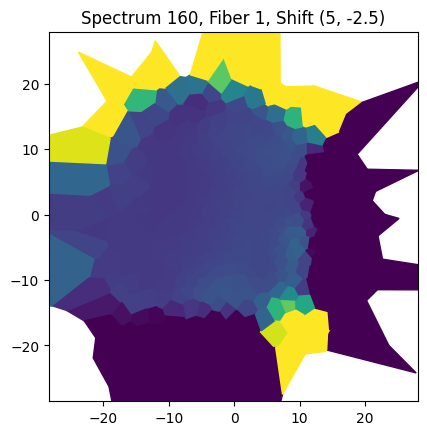

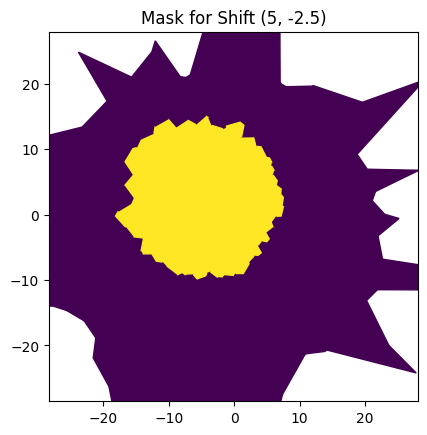

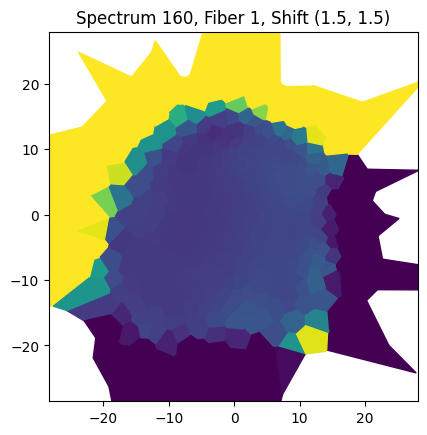

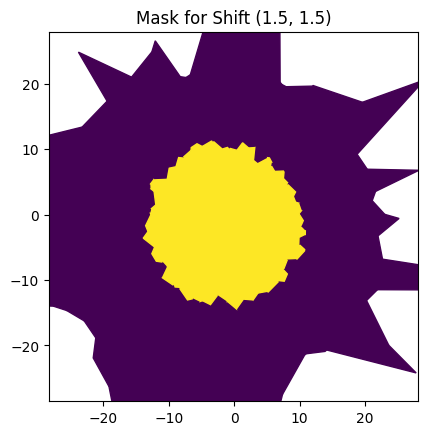

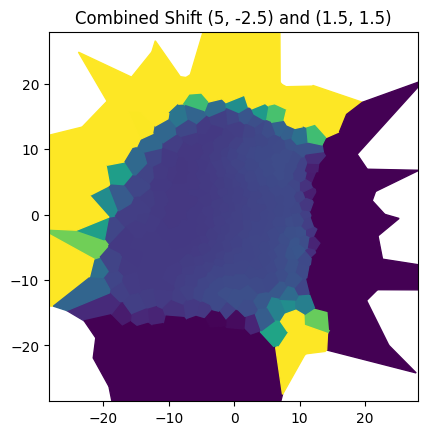

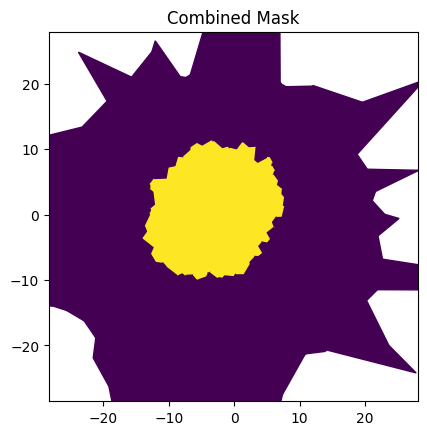

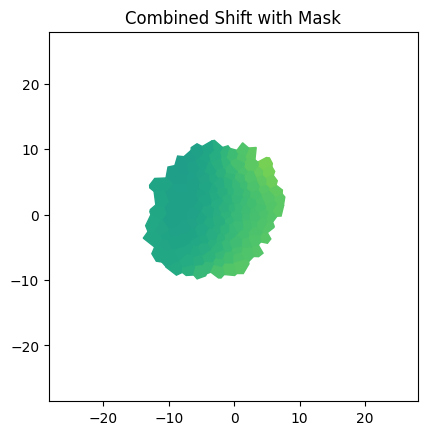

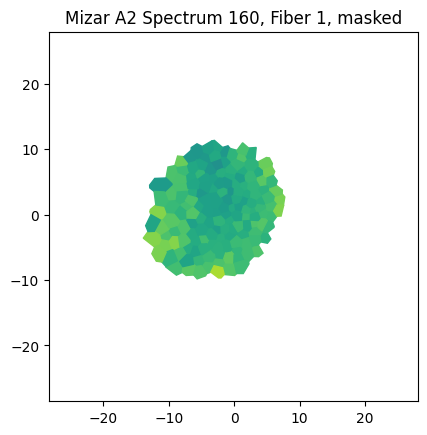

In [204]:
specind = 160
fibind = 1
xshift1 = 5
yshift1 = -2.5

xshift2 = 1.5
yshift2 = 1.5

point1 = mapmodel3.compute_vec(specind, fibind, xshift1, yshift1)
ax = show_voronoi(mapmodel3.vor, point1, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask1 = make_fov_mask(mapmodel3, center=(-xshift1, -yshift1), radius=12)
ax = show_voronoi(mapmodel3.vor, mask1)
ax.set_title(f'Mask for Shift ({xshift1}, {yshift1})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

point2 = mapmodel3.compute_vec(specind, fibind, xshift2, yshift2)
ax = show_voronoi(mapmodel3.vor, point2, vmin=0, vmax=0.01)
ax.set_title(f'Spectrum {specind}, Fiber {fibind}, Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask2 = make_fov_mask(mapmodel3, center=(-xshift2, -yshift2), radius=12)
ax = show_voronoi(mapmodel3.vor, mask2)
ax.set_title(f'Mask for Shift ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

combined = (point1 + point2)/2
ax = show_voronoi(mapmodel3.vor, combined, vmin=0, vmax=0.01)
ax.set_title(f'Combined Shift ({xshift1}, {yshift1}) and ({xshift2}, {yshift2})')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask_combined = mask1 & mask2
ax = show_voronoi(mapmodel3.vor, mask_combined)
ax.set_title('Combined Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

mask_combined = mask_combined.astype(float)
mask_combined[mask_combined == 0] = np.nan  # Convert mask to float and set 0s to NaN for masking
masked_model = combined * mask_combined

renormalized_model = masked_model / np.nansum(masked_model)  # Renormalize the masked model

ax = show_voronoi(mapmodel3.vor, renormalized_model, vmin=0, vmax=0.01)
ax.set_title('Combined Shift with Mask')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

masked_data = mapmodel3.normdata[:, fibind, specind] * mask_combined
renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data

ax = show_voronoi(mapmodel3.vor, renormalized_data, vmin=0, vmax=0.01)
ax.set_title(f'Mizar A2 Spectrum {specind}, Fiber {fibind}, masked')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
def compute_chi2(params, mapmodel, specind, fibind, fov_radius = 12, normalize_by_error = True,
                 plot = False):

    if len(params) == 4:
        [xshift1, yshift1, xshift2, yshift2] = params
        point1 = mapmodel.compute_vec(specind, fibind, xshift1, yshift1)
        point2 = mapmodel.compute_vec(specind, fibind, xshift2, yshift2)
        combined = (point1 + point2) / 2
        mask1 = make_fov_mask(mapmodel, center=(-xshift1, -yshift1), radius=fov_radius)
        mask2 = make_fov_mask(mapmodel, center=(-xshift2, -yshift2), radius=fov_radius)
        mask_combined = mask1 & mask2
        mask_combined = mask_combined.astype(float)
        mask_combined[mask_combined == 0] = np.nan  # Convert mask to float and set 0s to NaN for masking
        masked_model = combined * mask_combined
    elif len(params) == 2:
        [xshift, yshift] = params
        point = mapmodel.compute_vec(specind, fibind, xshift, yshift)
        mask_combined = make_fov_mask(mapmodel, center=(-xshift, -yshift), radius=fov_radius)
        mask_combined = mask_combined.astype(float)
        mask_combined[mask_combined == 0] = np.nan
        masked_model = point * mask_combined
        
    renormalized_model = masked_model / np.nansum(masked_model)  # Renormalize the masked model
    masked_data = mapmodel.normdata[:, fibind, specind] * mask_combined
    renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
    if normalize_by_error:
        chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )
    else:
        chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)

    if plot:
        fig, axs = plt.subplots(ncols=2, figsize=(6,3))
        show_voronoi(mapmodel.vor, renormalized_model, vmin=0, vmax=0.01, ax = axs[0])
        axs[0].set_title(f'Combined Shift {params}, Spectrum {specind}, Fiber {fibind}')
        show_voronoi(mapmodel.vor, renormalized_data, vmin=0, vmax=0.01, ax = axs[1])
        axs[1].set_title(f'Mizar A2 Spectrum {specind}, Fiber {fibind}, masked')
        fig.tight_layout()
        plt.show()
    return chi2

def compute_chi2_allfibs(params, mapmodel, specind, binary_params_as_sep_contrast = True, fov_radius = 12, normalize_by_error = True, plot = False):
    # print("Trying params:", params)

    if binary_params_as_sep_contrast:
        if len(params) == 4:
            [xshift, yshift, separation, angle] = params
            xshift1 = xshift + (separation / 2) * np.cos(np.radians(angle))
            yshift1 = yshift + (separation / 2) * np.sin(np.radians(angle))
            xshift2 = xshift - (separation / 2) * np.cos(np.radians(angle))
            yshift2 = yshift - (separation / 2) * np.sin(np.radians(angle))
            params = [xshift1, yshift1, xshift2, yshift2]
        
    chi2s = []
    for fibind in range(mapmodel.normdata.shape[1]):
        chi2 = compute_chi2(params, mapmodel, specind, fibind, fov_radius=fov_radius, normalize_by_error=normalize_by_error, plot=plot)
        chi2s.append(chi2)
    return np.nansum(chi2s)

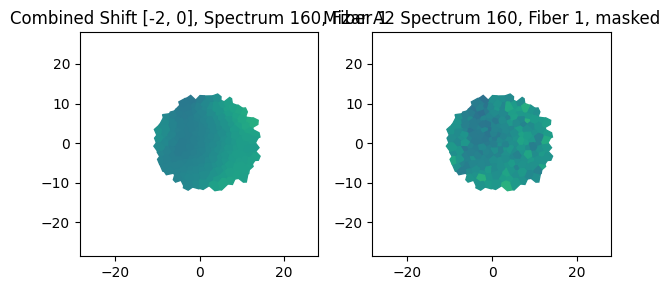

np.float64(8.749859473235452)

In [15]:
compute_chi2([-2, 0], mapmodel3, specind=160, fibind=1, fov_radius=12, normalize_by_error=True, plot=True)

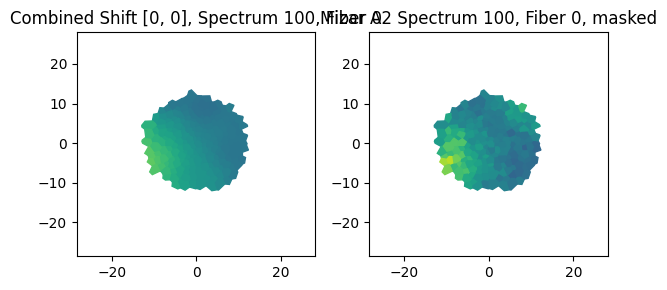

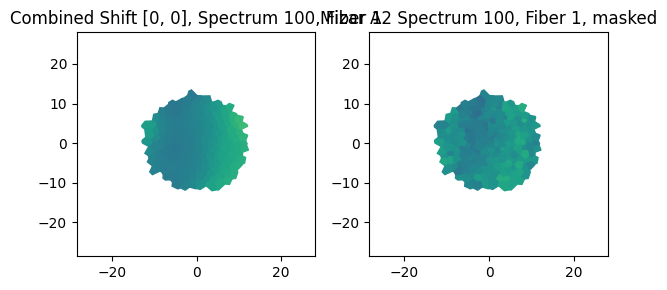

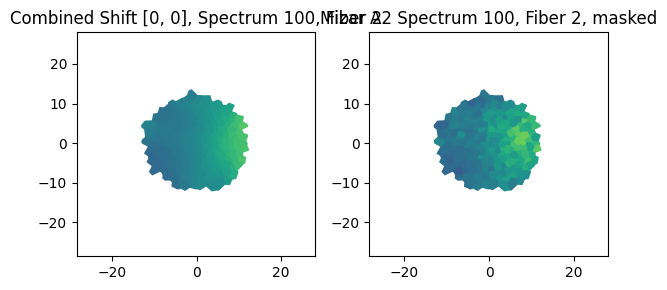

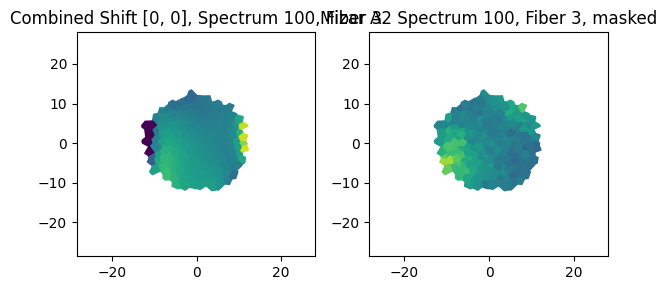

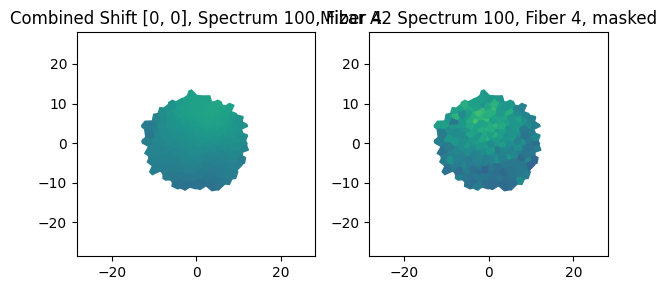

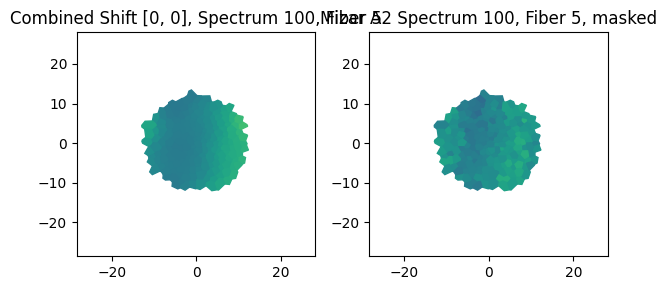

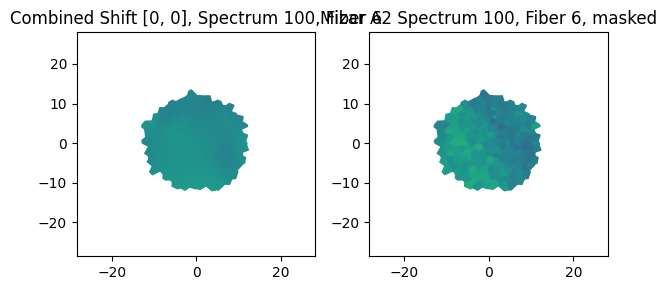

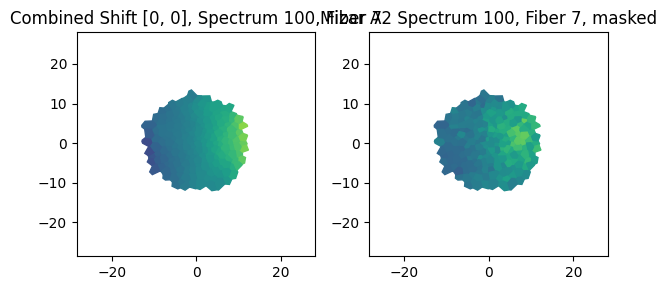

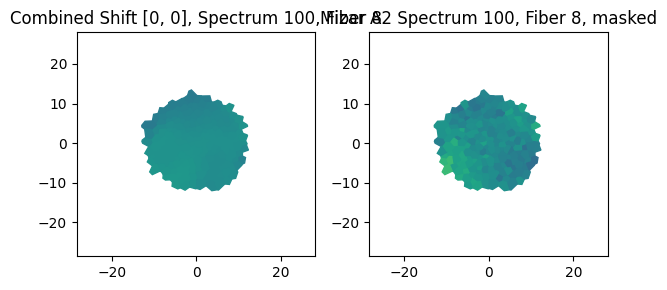

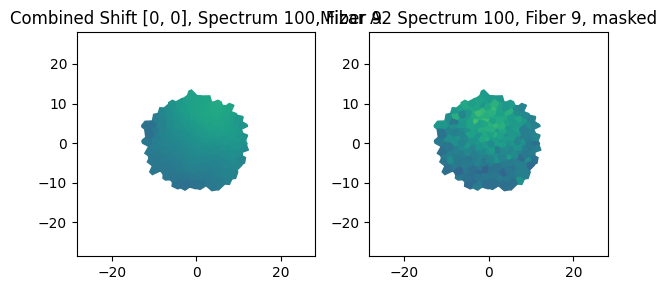

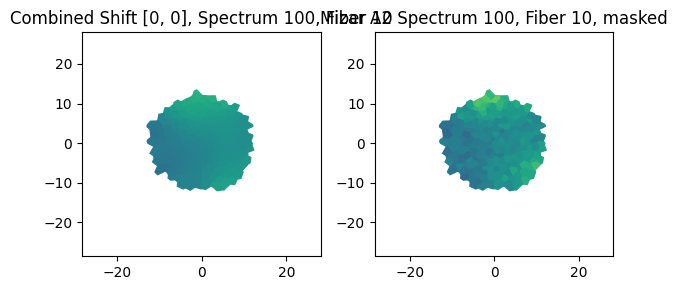

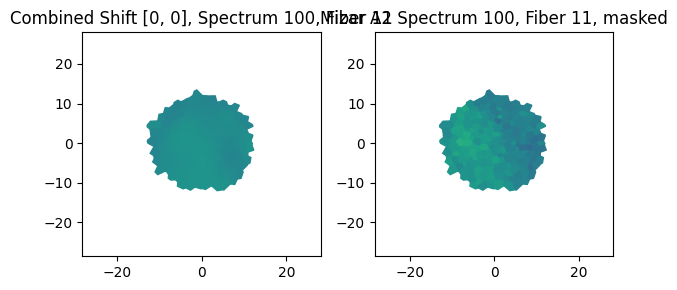

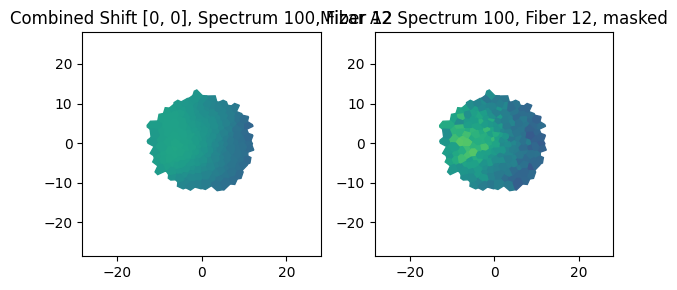

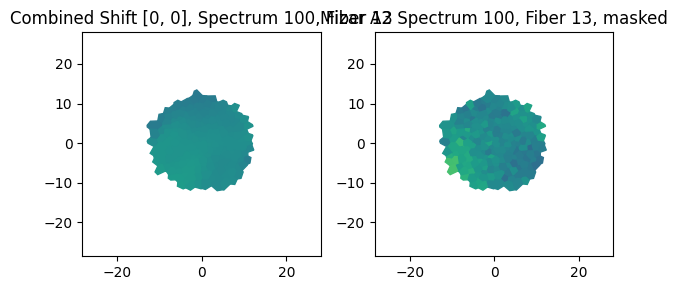

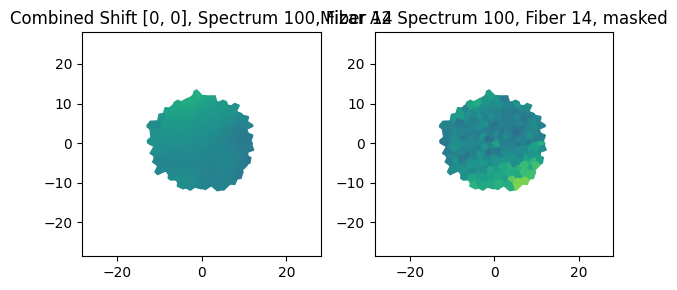

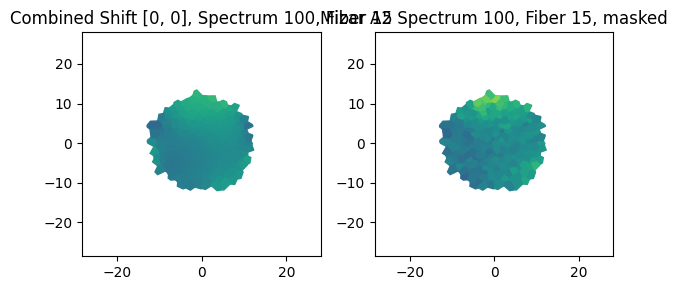

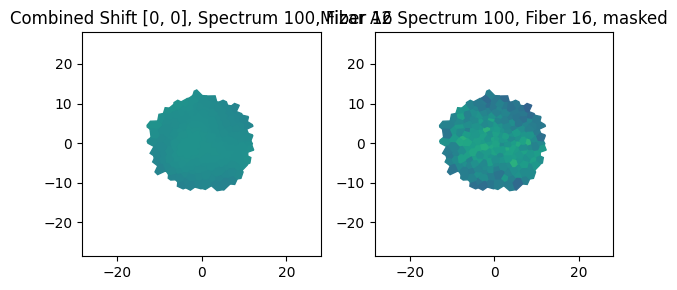

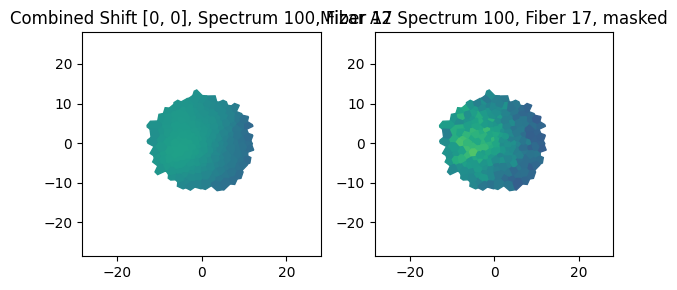

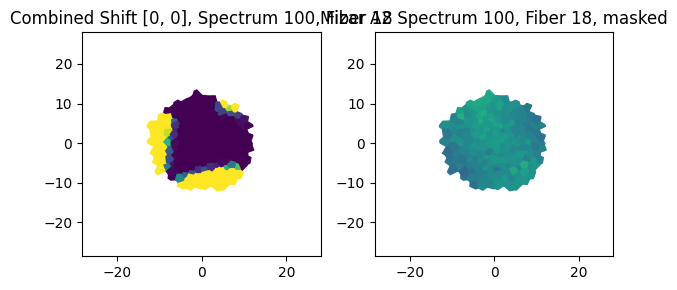

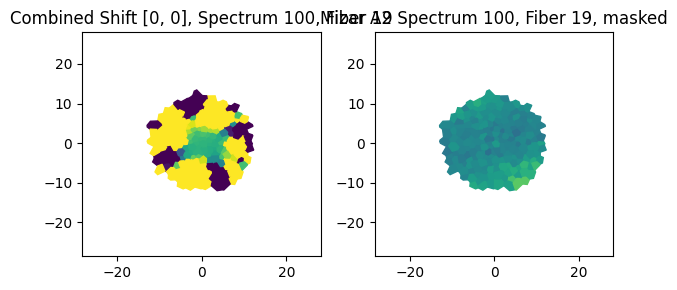

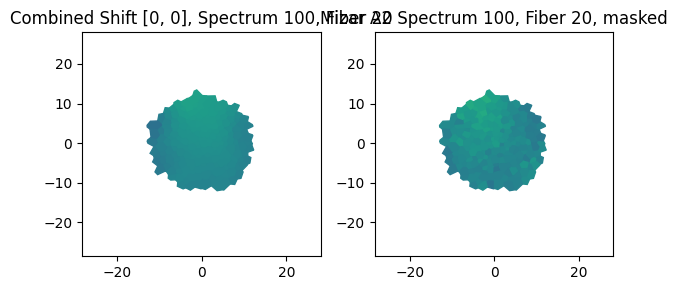

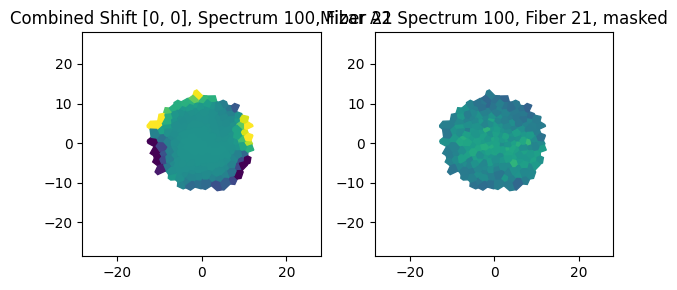

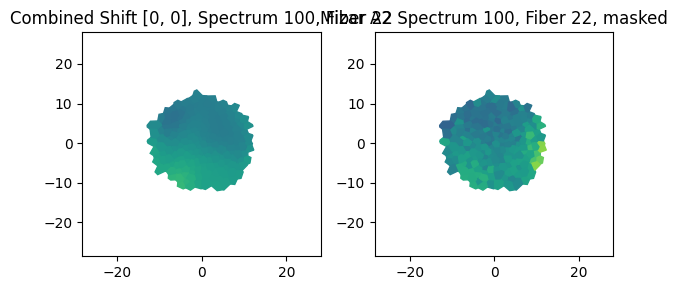

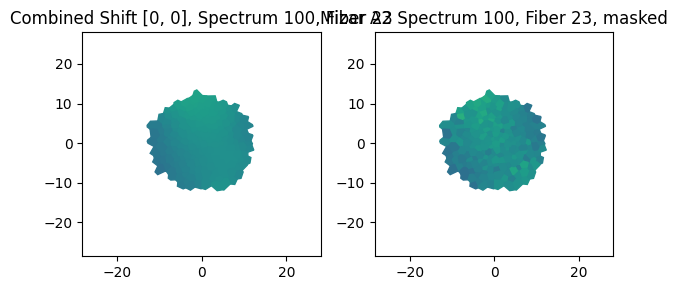

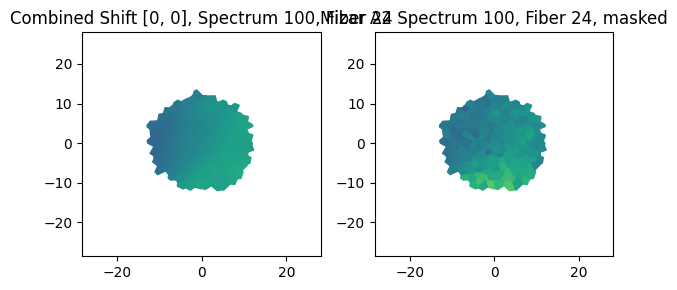

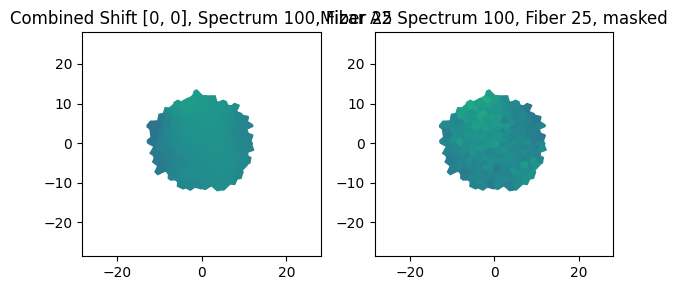

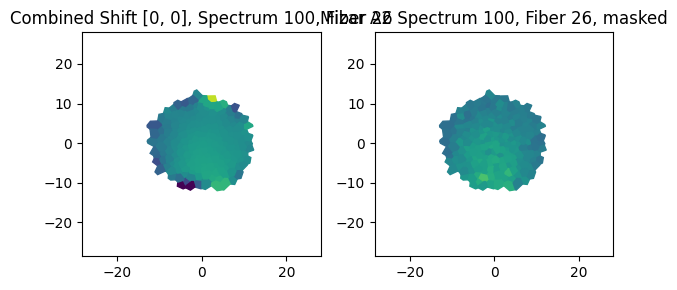

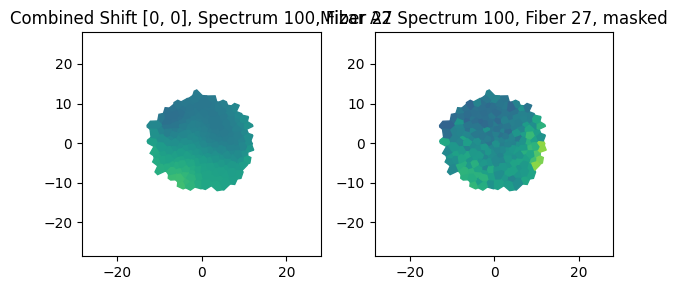

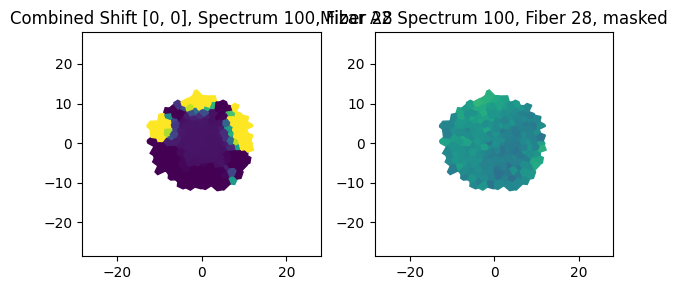

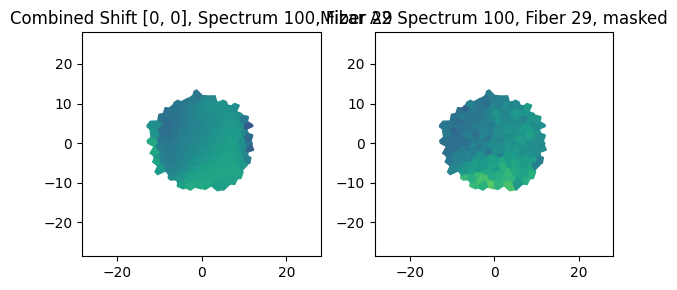

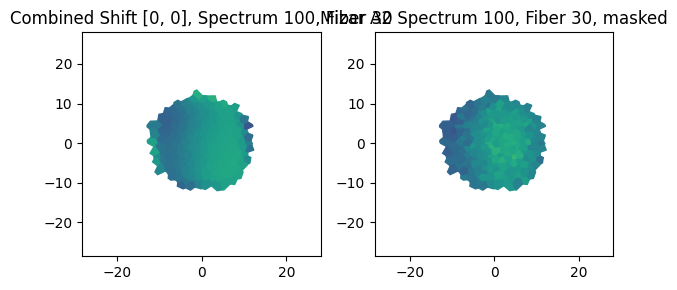

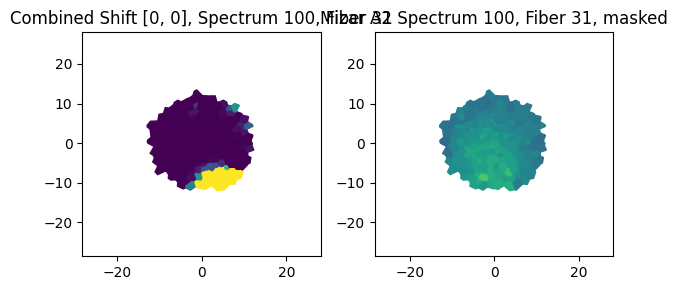

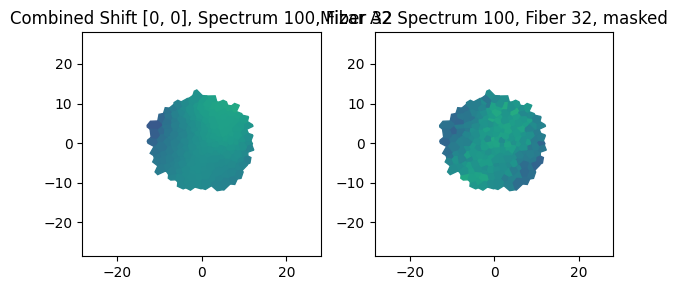

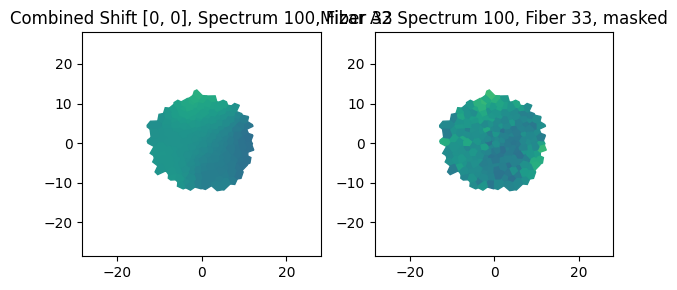

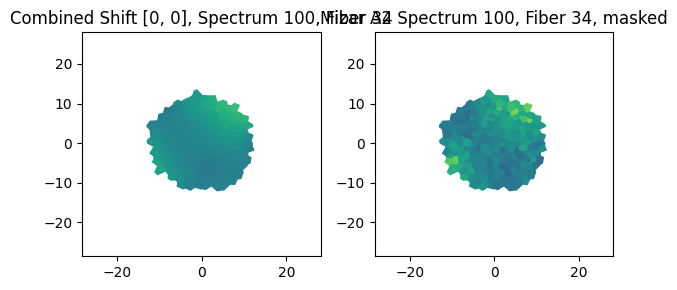

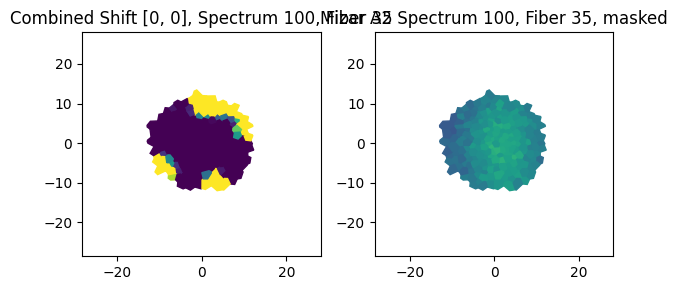

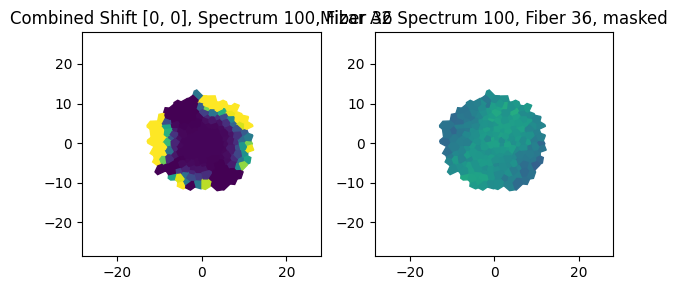

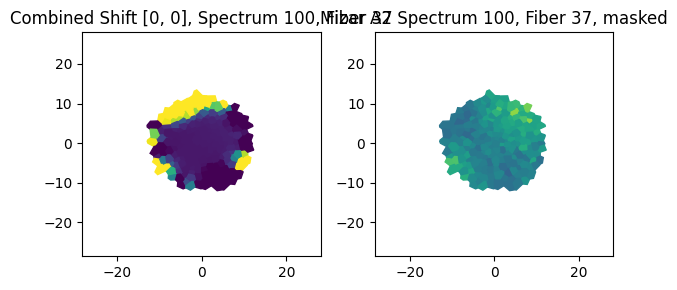

np.float64(1949270.689267623)

In [17]:
xshift1, yshift1 = 0, 0
# xshift2, yshift2 = 0, 0

compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, plot=True)

In [191]:
specind = 160
xshift1, yshift1 = -5.25, -3
xshift2, yshift2 = 3,2

compute_chi2_allfibs([xshift1, yshift1, xshift2, yshift2], mapmodel3, specind)

/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:26: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


np.float64(707675.4647954144)

In [234]:
specind = 160
xshift1, yshift1 = -5.0, -2.8
xshift2, yshift2 = -5.0, -2.8 #3,2

print(compute_chi2_allfibs([xshift1, yshift1, xshift2, yshift2], mapmodel3, specind, normalize_by_error=False, binary_params_as_sep_contrast=False))

ds = 3
xshift1 += ds
yshift1 -= ds
xshift2 -= ds
yshift2 += ds

print(compute_chi2_allfibs([xshift1, yshift1, xshift2, yshift2], mapmodel3, specind, normalize_by_error=False, binary_params_as_sep_contrast=False))

0.00847747125453508
0.02618723127486993


/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:28: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)


In [194]:
def search_secondary(params, params0, mapmodel, specind):
    p = [params0[0], params0[1], params[0], params[1]]
    chi2 = compute_chi2_allfibs(p, mapmodel, specind, binary_params_as_sep_contrast = False)
    return chi2

from scipy.optimize import minimize
opt = minimize(search_secondary, [xshift2, yshift2], args=([xshift1, yshift1], mapmodel3, specind), method='Powell')

/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:26: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:26: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


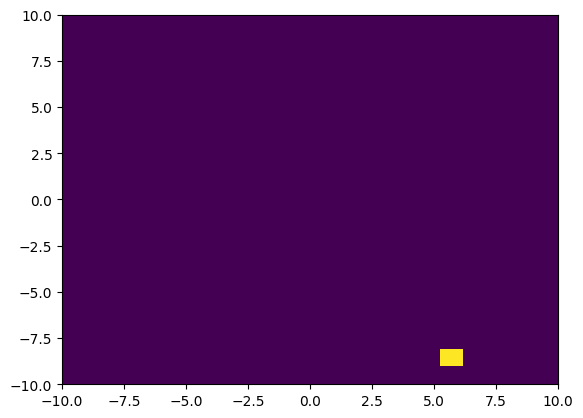

In [195]:
xarr = np.linspace(-10, 10, 21)
yarr = np.linspace(-10, 10, 21)
X, Y = np.meshgrid(xarr, yarr)
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = search_secondary([X[i, j], Y[i, j]], [xshift1, yshift1], mapmodel3, specind)

plt.imshow(Z, extent=(-10, 10, -10, 10), origin='lower', aspect='auto', cmap='viridis')

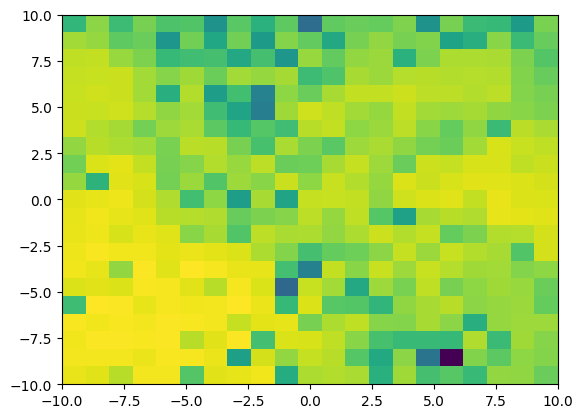

In [196]:
plt.imshow(-np.log10(Z), extent=(-10, 10, -10, 10), origin='lower', aspect='auto', cmap='viridis')


In [150]:
opt

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 356802.78363386175
       x: [ 1.767e+00  4.847e+00]
     nit: 4
   direc: [[ 0.000e+00  1.000e+00]
           [-5.707e-01  4.665e-02]]
    nfev: 189

In [151]:
opt.x

array([1.76682174, 4.84743009])

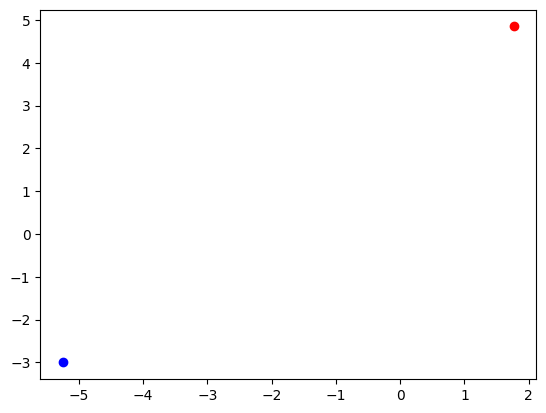

In [152]:
plt.scatter(opt.x[0], opt.x[1], label='Secondary Shift', color='red')
plt.scatter(xshift1, yshift1, label='Primary Shift', color='blue')

/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:28: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)


0.006581341801593843


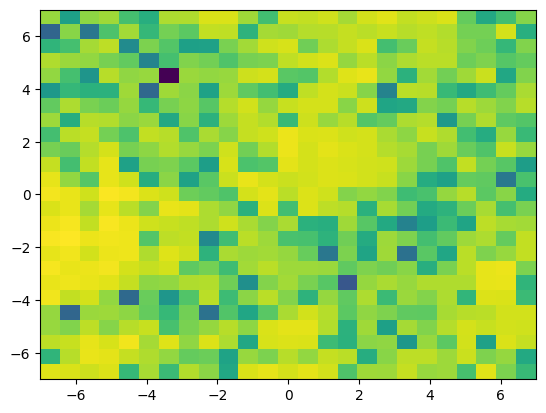

In [167]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 15, normalize_by_error=False)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


/tmp/ipykernel_455050/794035585.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/794035585.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


169296.18835817894


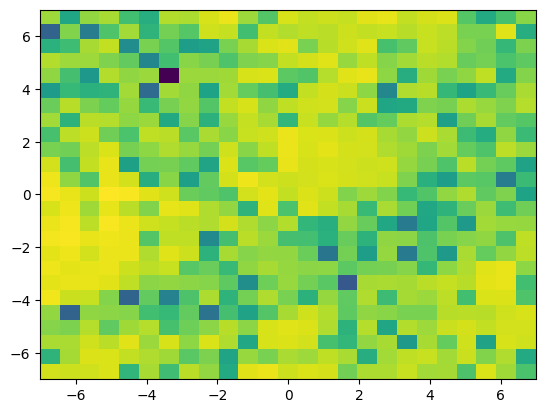

In [161]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 15)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


In [190]:
print(compute_chi2_allfibs([-6, -2, 0,1], mapmodel3, specind, fov_radius = 15, normalize_by_error=False, binary_params_as_sep_contrast=False))
print(compute_chi2_allfibs([-6, -2, -6, -2], mapmodel3, specind, fov_radius = 15, normalize_by_error=False, binary_params_as_sep_contrast=False))
print(compute_chi2_allfibs([-6, -2], mapmodel3, specind, fov_radius = 15, normalize_by_error=False))
print(compute_chi2_allfibs([1.0, 1.0], mapmodel3, specind, fov_radius = 15, normalize_by_error=False))

0.5097297447027163
0.007413254993189149
0.007413254993189149
0.014834997271830115


/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:28: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)


/tmp/ipykernel_455050/794035585.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/794035585.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


164113.70077594477


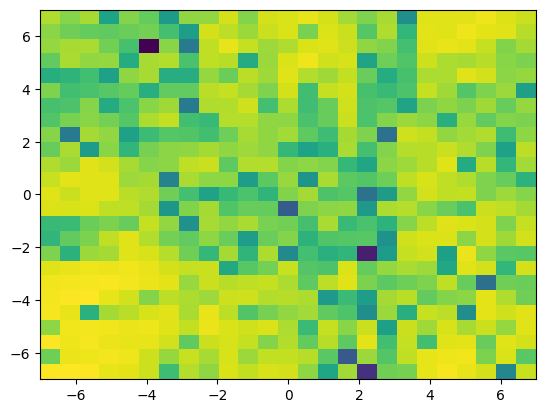

In [162]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 20)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:28: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)


0.006519191619090992


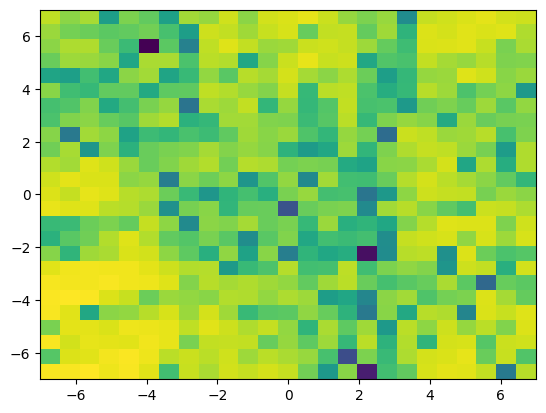

In [169]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 20, normalize_by_error=False)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


/tmp/ipykernel_455050/794035585.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/794035585.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


139325.92938722507


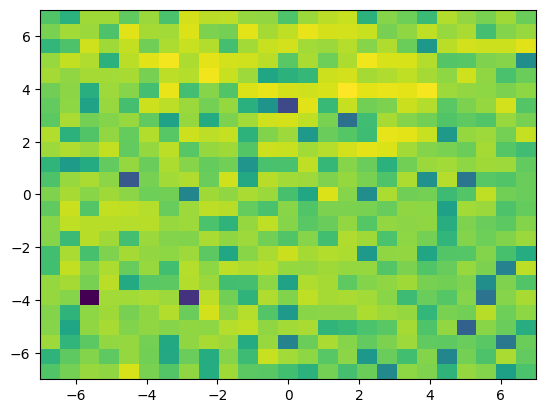

In [163]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 8)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


/tmp/ipykernel_455050/4208610984.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/4208610984.py:28: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2)


0.004234037720241719


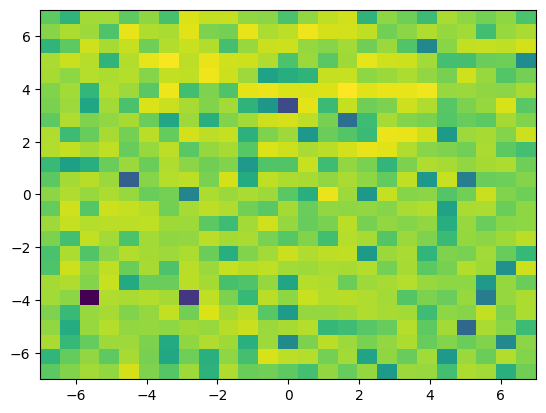

In [168]:
specind = 160
xarr = np.linspace(-7, 7, 25)
xg, yg = np.meshgrid(xarr, xarr)
chi2s = np.zeros_like(xg)
for i in range(xg.shape[0]):
    for j in range(xg.shape[1]):
        xshift1 = xg[i, j]
        yshift1 = yg[i, j]
        chi2s[i, j] = compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind, fov_radius = 8, normalize_by_error=False)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(-7, 7, -7, 7), aspect='auto')
print(np.nanmin(chi2s))


In [136]:
print(np.argmin(chi2s))
xshift1 = xarr[np.argmin(chi2s) % chi2s.shape[1]]
yshift1 = xarr[np.argmin(chi2s) // chi2s.shape[1]]
print(f"Best shift: ({xshift1}, {yshift1})")
print(f"Chi2: {np.min(chi2s)}")

178
Best shift: (-5.25, -2.916666666666666)
Chi2: 220373.06321437328


In [137]:
compute_chi2_allfibs([xshift1, yshift1], mapmodel3, specind)

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


np.float64(220373.06321437328)

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


Optimization result:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 432375.9297468799
       x: [ 1.358e+00  2.505e+00]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 153


(-5.0, 5.0)

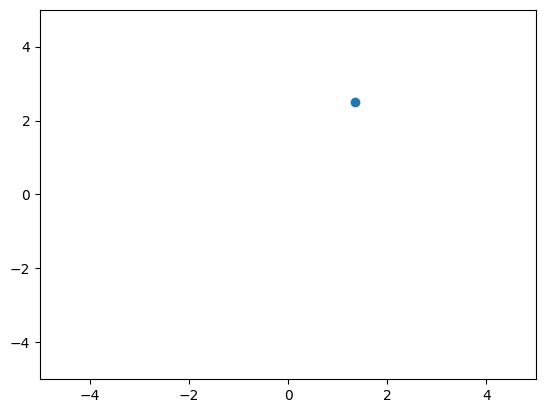

In [129]:
from scipy.optimize import minimize
initial_guess = [xshift1, yshift1] #[1.7,1.3]  # Initial guess for the shifts
specind = 120

result = minimize(compute_chi2_allfibs, initial_guess, args=(mapmodel3, specind), method='Powell')
print("Optimization result:", result)

plt.scatter(result.x[0], result.x[1], label='Shift 1')
# plt.scatter(result.x[2], result.x[3], label='Shift 2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


Optimization result:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 445049.87349749164
             x: [ 2.272e+00  1.247e+00]
           nit: 120
          nfev: 239
 final_simplex: (array([[ 2.272e+00,  1.247e+00],
                       [ 2.272e+00,  1.247e+00],
                       [ 2.272e+00,  1.247e+00]]), array([ 4.450e+05,  4.450e+05,  4.450e+05]))


(-5.0, 5.0)

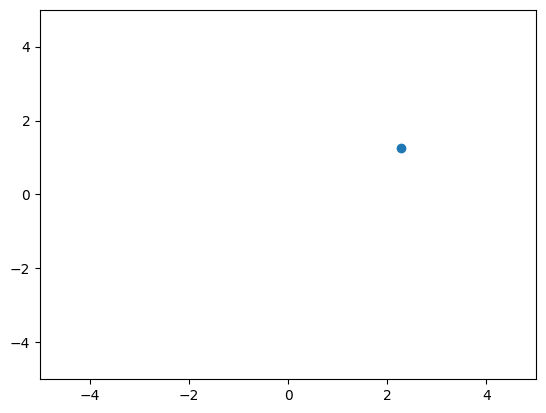

In [94]:
from scipy.optimize import minimize
initial_guess = [2.2, 1.2]  # Initial guess for the shifts
specind = 120

result = minimize(compute_chi2_allfibs, initial_guess, args=(mapmodel3, specind), method='Nelder-Mead')
print("Optimization result:", result)

plt.scatter(result.x[0], result.x[1], label='Shift 1')
# plt.scatter(result.x[2], result.x[3], label='Shift 2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


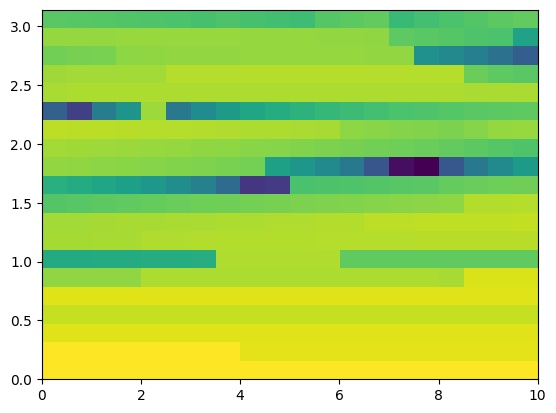

In [130]:
xc, yc = 1.35, 2.5 #2.2, 1.2

seps = np.linspace(0, 10, 20)
angles = np.linspace(0, np.pi, 20)
chi2s = np.zeros((len(seps), len(angles)))
for i, sep in enumerate(seps):
    for j, angle in enumerate(angles):
        chi2s[i, j] = compute_chi2_allfibs([xc, yc, sep, angle], mapmodel3, specind)
plt.imshow(-np.log10(chi2s), origin='lower', extent=(min(seps), max(seps), min(angles), max(angles)), aspect='auto',
           cmap='viridis')

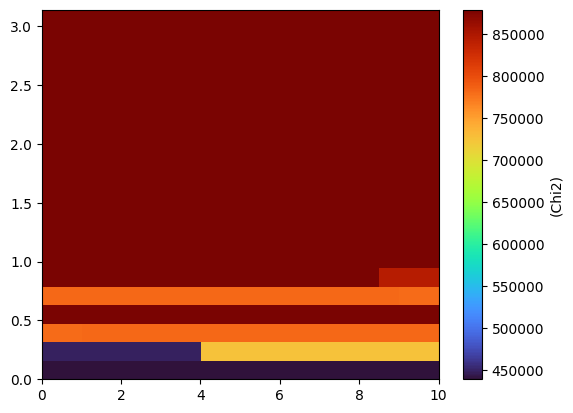

In [132]:
plt.imshow((chi2s), origin='lower',  extent = (min(seps), max(seps), min(angles), max(angles)), aspect='auto',
           cmap='turbo', vmin=np.nanmin(chi2s), vmax=np.nanmin(chi2s)*2)
plt.colorbar(label='(Chi2)')

In [131]:
print(np.argmin(chi2s))
sep = seps[np.argmin(chi2s) % chi2s.shape[1]]
angle = angles[np.argmin(chi2s) // chi2s.shape[1]]
print(f"Best separation: {sep}, angle: {angle}")
print(f"Chi2: {np.min(chi2s)}")

0
Best separation: 0.0, angle: 0.0
Chi2: 439550.91828910325


In [115]:
compute_chi2_allfibs([xc, yc, sep, angle], mapmodel3, specind)

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


np.float64(729147.5595752726)

In [116]:
compute_chi2_allfibs([xc, yc, 0, 0], mapmodel3, specind)


/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


np.float64(798931.0287036436)

In [117]:
compute_chi2_allfibs([xc, yc], mapmodel3, specind)


/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


np.float64(798931.0287036436)

In [118]:
xc

2.2

In [120]:
yc

1.2

/tmp/ipykernel_455050/2263389272.py:24: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/2263389272.py:25: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


Optimization result:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 563374.1776451467
       x: [ 2.157e+00  1.940e+00  4.150e+00  7.744e-01]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
    nfev: 390


(-5.0, 5.0)

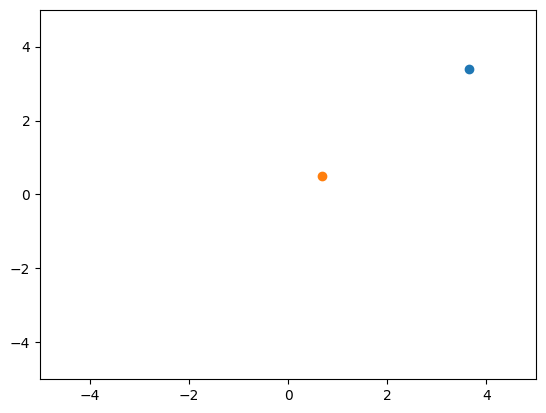

In [96]:
from scipy.optimize import minimize
initial_guess = [2.2, 1.2, 4, np.pi/4]  # Initial guess for the shifts
specind = 120

result = minimize(compute_chi2_allfibs, initial_guess, args=(mapmodel3, specind), method='Powell')
print("Optimization result:", result)

xshift1 = result.x[0] + result.x[2] / 2 * np.cos(result.x[3])
yshift1 = result.x[1] + result.x[2] / 2 * np.sin(result.x[3])
xshift2 = result.x[0] - result.x[2] / 2 * np.cos(result.x[3])
yshift2 = result.x[1] - result.x[2] / 2 * np.sin(result.x[3])
plt.scatter(xshift1, yshift1, label='Shift 1')
plt.scatter(xshift2, yshift2, label='Shift 2')

# plt.scatter(result.x[0], result.x[1], label='Shift 1')
# plt.scatter(result.x[2], result.x[3], label='Shift 2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])

/tmp/ipykernel_455050/415800042.py:15: RuntimeWarning: invalid value encountered in divide
  renormalized_data = masked_data / np.nansum(masked_data)  # Renormalize the masked data
/tmp/ipykernel_455050/415800042.py:16: RuntimeWarning: Mean of empty slice
  chi2 = np.nanmean((renormalized_model - renormalized_data) ** 2 / mapmodel.datanormvar[:, fibind, specind] )


Optimization result:  message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 701403.4750973417
       x: [ 1.442e-01 -1.910e-01  4.466e-02 -3.215e-02]
     nit: 7
   direc: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
    nfev: 898


(-5.0, 5.0)

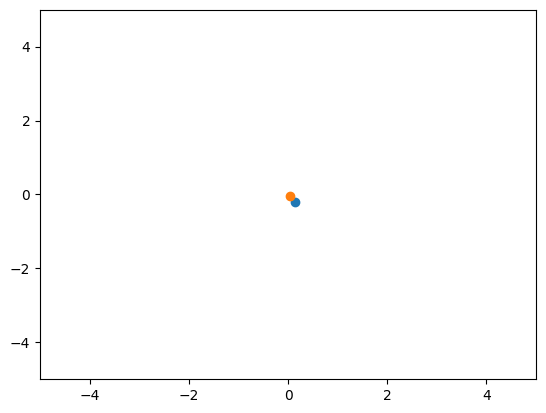

In [75]:
from scipy.optimize import minimize
initial_guess = [0,0,0,0]  # Initial guess for the shifts
specind = 120

result = minimize(compute_chi2_allfibs, initial_guess, args=(mapmodel3, specind), method='Powell')
print("Optimization result:", result)

plt.scatter(result.x[0], result.x[1], label='Shift 1')
plt.scatter(result.x[2], result.x[3], label='Shift 2')
plt.xlim([-5, 5])
plt.ylim([-5, 5])